In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
import seaborn as sns
from tabulate import tabulate
import re
sns.set(font_scale=1.8, style="whitegrid")

In [2]:
seeds = ["10","20","30","40","50","60"]
tempos = ["010","020", "030"]
salvarGraficos = False
confianca = 95

In [3]:
dfReal = pd.read_table("../Ambiente real/Saidas/teste4_sw010/iperfs.txt", sep="\s+")
dfSimu = pd.read_table("logs/seed40/010/dinamica/010dinamica-40-iperfs.txt", sep="\s+")
dfReal.rename(columns={'Inicio(seg)':'Inicio'}, inplace=True)
dfSimu.rename(columns={'Inicio(seg)':'Inicio'}, inplace=True)
dfReal.rename(columns={'Duracao(seg)':'Duracao'}, inplace=True)
dfSimu.rename(columns={'Duracao(seg)':'Duracao'}, inplace=True)
dfReal["Estavel"] = dfReal["Inicio"] + dfReal["Duracao"]
dfSimu["Estavel"] = dfSimu["Inicio"] + dfSimu["Duracao"]
dfReal.query("Estavel >= 150 and Inicio <= 250", inplace=True)
dfSimu.query("Estavel >= 150 and Inicio <= 250", inplace=True)

In [4]:
print ("Media da banda em kbps no ambiente real: " + str(dfReal["Banda(Kbps)"].mean()))
print ("Media da banda em kbps na simulacao: " + str(dfSimu["Banda(Kbps)"].mean()))
print(" ")
print ("Media da duracao em segundos no ambiente real: " + str(dfReal["Duracao"].mean()))
print ("Media da duracao em segundos na simulacao: " + str(dfSimu["Duracao"].mean()))

Media da banda em kbps no ambiente real: 1044.8861224031107
Media da banda em kbps na simulacao: 987.7307133550489
 
Media da duracao em segundos no ambiente real: 57.52154875113415
Media da duracao em segundos na simulacao: 58.64604495114007


(array([   0, 2000, 4000, 6000]), <a list of 4 Text xticklabel objects>)

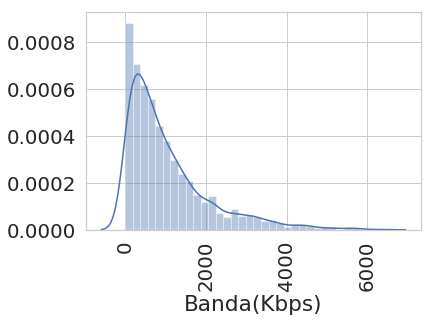

In [5]:
snsplt = sns.distplot(dfReal["Banda(Kbps)"])
# snsplt.set(xticks=(0,1000,2000,3000,4000,5000,6000))
# plt.xticks(rotation=90)
snsplt.set(xticks=(0,2000,4000,6000))
plt.xticks(rotation=90)

(array([   0, 2000, 4000, 6000]), <a list of 4 Text xticklabel objects>)

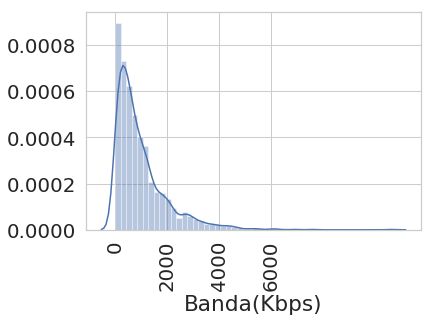

In [6]:
snsplt = sns.distplot(dfSimu["Banda(Kbps)"])
snsplt.set(xticks=(0,2000,4000,6000))
plt.xticks(rotation=90)

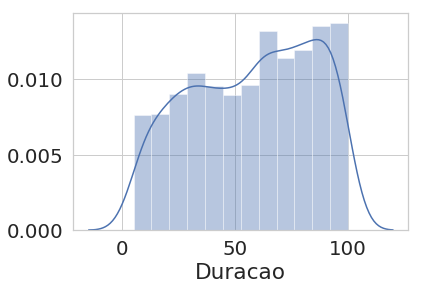

In [7]:
sns.distplot(dfReal["Duracao"])

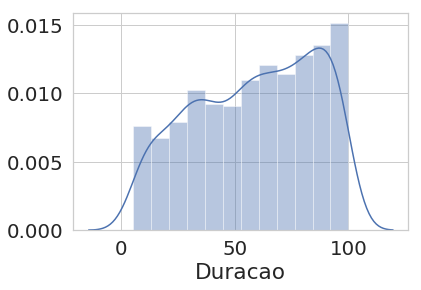

In [8]:
sns.distplot(dfSimu["Duracao"])

In [9]:
dfAplic = pd.read_table("logs/seed40/010/dinamica/010dinamica-40-traffic-qos-l7-app.log", sep="\s+")
dfAplic.rename(columns={'Time:s':'Time'}, inplace=True)
dfAplic.query("Time >= 150 and Time <= 250 and TxPkts > 0", inplace=True)
print ("RxBytes: "+str(dfAplic["RxBytes"].sum()))

RxBytes: 6855858030
